##**Association Rules**

In [2]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
warnings.filterwarnings('ignore')

### Loading Dataset and basic data exploration

In [3]:
# Importing Dataset
data = pd.read_excel("Online retail.xlsx", sheet_name='Sheet1')
data.head()

,Food_ Name
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [4]:
data.shape

(7501, 1)

In [5]:
# checking for null values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Food_ Name  7501 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [6]:
# Checking for Null Values
data.isnull().sum()

Food_ Name    0
dtype: int64

In [7]:
data = data.drop_duplicates() # dropping duplicate values
data.shape

(5176, 1)

In [8]:
# Splitting the 'Food_Name' column values into separate items
transactions = data['Food_ Name'].apply(lambda x: x.split(','))
transactions[0:10]

0    [shrimp, almonds, avocado, vegetables mix, gre...
1                           [burgers, meatballs, eggs]
2                                            [chutney]
3                                    [turkey, avocado]
4    [mineral water, milk, energy bar, whole wheat ...
5                                     [low fat yogurt]
6                    [whole wheat pasta, french fries]
7                         [soup, light cream, shallot]
8            [frozen vegetables, spaghetti, green tea]
9                                       [french fries]
Name: Food_ Name, dtype: object

In [9]:
# Create a list of transactions
transactions_list = transactions.tolist()
transactions_list[0:10]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries']]

### Association Rule Mining with Apriori Algorithm

In [10]:
# Use TransactionEncoder to transform the transaction list into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions_list).transform(transactions_list)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [11]:
df_encoded.shape

(5176, 120)

Association rules with 5% Support and 80% confidence

In [12]:
# Initial thresholds
min_support = 0.05
min_confidence = 0.7
min_lift = 1.0

# Apply the Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.113794,(burgers)
1,0.103555,(cake)
2,0.054869,(champagne)
3,0.083849,(chicken)
4,0.205178,(chocolate)
5,0.060665,(cookies)
6,0.071870,(cooking oil)
7,0.208076,(eggs)
8,0.083849,(escalope)
9,0.192620,(french fries)


In [13]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_confidence)

# Display the generated rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(chocolate),0.299845,0.205178,0.073223,0.244201,1.190193,0.011701,1.051632,0.228235
1,(chocolate),(mineral water),0.205178,0.299845,0.073223,0.356874,1.190193,0.011701,1.088674,0.201051
2,(chocolate),(spaghetti),0.205178,0.229521,0.055835,0.272128,1.185635,0.008742,1.058537,0.196988
3,(spaghetti),(chocolate),0.229521,0.205178,0.055835,0.243266,1.185635,0.008742,1.050332,0.203212
4,(eggs),(mineral water),0.208076,0.299845,0.070131,0.337047,1.124070,0.007741,1.056115,0.139377
5,(mineral water),(eggs),0.299845,0.208076,0.070131,0.233892,1.124070,0.007741,1.033698,0.157645
6,(eggs),(spaghetti),0.208076,0.229521,0.051391,0.246982,1.076078,0.003633,1.023189,0.089275
7,(spaghetti),(eggs),0.229521,0.208076,0.051391,0.223906,1.076078,0.003633,1.020397,0.091760
8,(mineral water),(frozen vegetables),0.299845,0.129830,0.050425,0.168170,1.295310,0.011496,1.046091,0.325620
9,(frozen vegetables),(mineral water),0.129830,0.299845,0.050425,0.388393,1.295310,0.011496,1.144778,0.262000


### Filter and Analyze the Rules

In [14]:
# Filter rules by lift and confidence
filtered_rules = rules[rules['lift'] > 1]

# Display filtered rules
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(chocolate),0.299845,0.205178,0.073223,0.244201,1.190193,0.011701,1.051632,0.228235
1,(chocolate),(mineral water),0.205178,0.299845,0.073223,0.356874,1.190193,0.011701,1.088674,0.201051
2,(chocolate),(spaghetti),0.205178,0.229521,0.055835,0.272128,1.185635,0.008742,1.058537,0.196988
3,(spaghetti),(chocolate),0.229521,0.205178,0.055835,0.243266,1.185635,0.008742,1.050332,0.203212
4,(eggs),(mineral water),0.208076,0.299845,0.070131,0.337047,1.124070,0.007741,1.056115,0.139377
5,(mineral water),(eggs),0.299845,0.208076,0.070131,0.233892,1.124070,0.007741,1.033698,0.157645
6,(eggs),(spaghetti),0.208076,0.229521,0.051391,0.246982,1.076078,0.003633,1.023189,0.089275
7,(spaghetti),(eggs),0.229521,0.208076,0.051391,0.223906,1.076078,0.003633,1.020397,0.091760
8,(mineral water),(frozen vegetables),0.299845,0.129830,0.050425,0.168170,1.295310,0.011496,1.046091,0.325620
9,(frozen vegetables),(mineral water),0.129830,0.299845,0.050425,0.388393,1.295310,0.011496,1.144778,0.262000


In [15]:
# Iterate through filtered_rules and print the rules
if filtered_rules.empty:
    print("No rules found with the specified thresholds.")
else:
    for index, rule in filtered_rules.iterrows():
        antecedents = ", ".join(list(rule['antecedents']))
        consequents = ", ".join(list(rule['consequents']))
        support = rule['support']
        confidence = rule['confidence']
        lift = rule['lift']
        print(f"Rule: If a customer buys {antecedents}, they are likely to buy {consequents} (Support: {support}, Confidence: {confidence}, Lift: {lift})")

Rule: If a customer buys mineral water, they are likely to buy chocolate (Support: 0.0732225656877898, Confidence: 0.24420103092783504, Lift: 1.1901925951812373)
Rule: If a customer buys chocolate, they are likely to buy mineral water (Support: 0.0732225656877898, Confidence: 0.3568738229755179, Lift: 1.1901925951812373)
Rule: If a customer buys chocolate, they are likely to buy spaghetti (Support: 0.05583462132921175, Confidence: 0.2721280602636535, Lift: 1.1856353871419785)
Rule: If a customer buys spaghetti, they are likely to buy chocolate (Support: 0.05583462132921175, Confidence: 0.2432659932659933, Lift: 1.1856353871419787)
Rule: If a customer buys eggs, they are likely to buy mineral water (Support: 0.07013137557959814, Confidence: 0.3370473537604457, Lift: 1.1240702983660225)
Rule: If a customer buys mineral water, they are likely to buy eggs (Support: 0.07013137557959814, Confidence: 0.23389175257731956, Lift: 1.1240702983660225)
Rule: If a customer buys eggs, they are likely

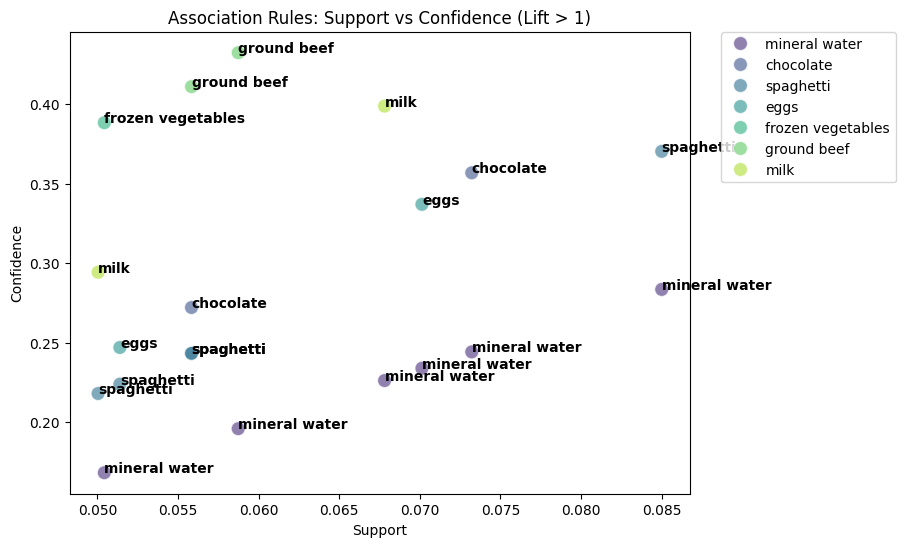

In [16]:
# Convert the frozensets to strings for better readability in the plot
filtered_rules['antecedents'] = filtered_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
filtered_rules['consequents'] = filtered_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Scatter plot
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='support', y='confidence', data=filtered_rules, hue='antecedents', palette='viridis', s=100, alpha=0.6)

# Adding annotations to the points
for line in range(0, filtered_rules.shape[0]):
    scatter.text(filtered_rules.support.iloc[line],
                 filtered_rules.confidence.iloc[line],
                 filtered_rules.antecedents.iloc[line], horizontalalignment='left',
                 size='medium', color='black', weight='semibold')

plt.title('Association Rules: Support vs Confidence (Lift > 1)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

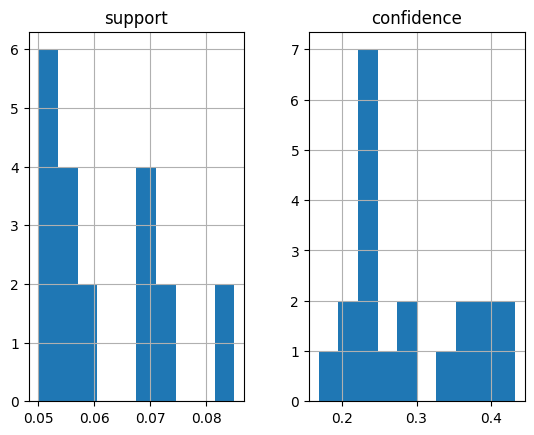

In [17]:
# visualization of obtained rule
filtered_rules[['support','confidence']].hist()
plt.show()

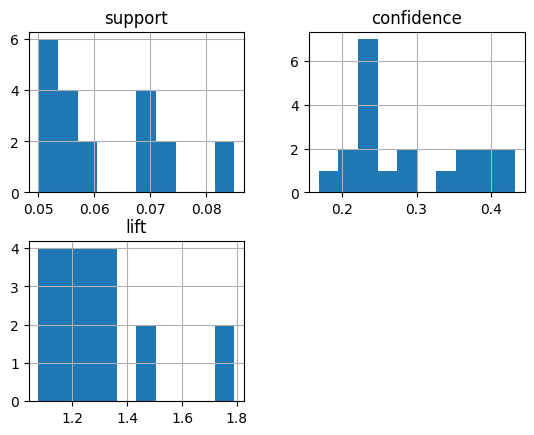

In [18]:
filtered_rules[['support','confidence','lift']].hist()
plt.show()

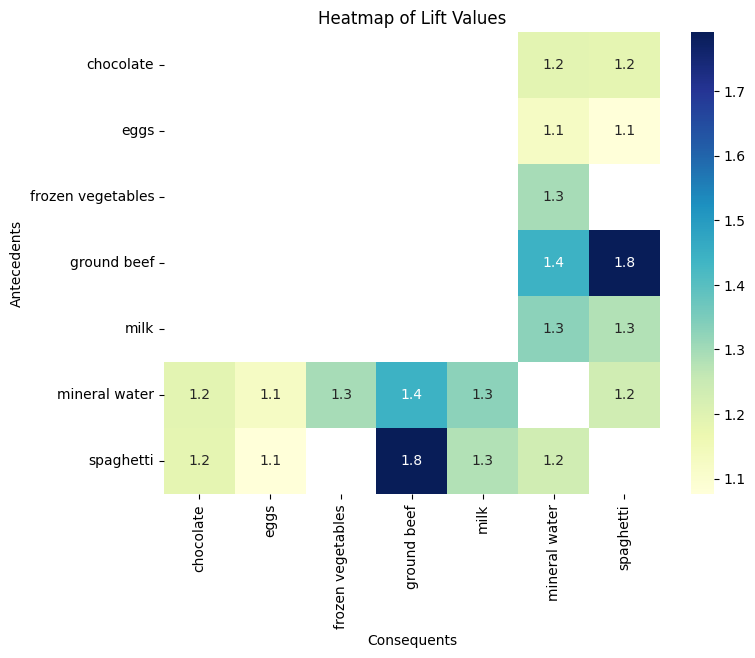

In [19]:
# Create a pivot table for the heatmap
pivot_table = filtered_rules.pivot(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Lift Values')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()

### Analysis of Generated Rules
The association rules generated from the dataset indicate patterns of co-purchase behavior among customers:

**Chocolate and Mineral Water:**

Rule: If a customer buys chocolate, they are likely to buy mineral water (Support: 0.073, Confidence: 0.357, Lift: 1.190).<br>
Rule: If a customer buys mineral water, they are likely to buy chocolate (Support: 0.073, Confidence: 0.244, Lift: 1.190).<br>
**Insight:** There is a mutual association between chocolate and mineral water. Customers who purchase one are inclined to purchase the other. This could suggest that these items are often bought together, possibly indicating common consumption habits or promotions that pair these products.

**Eggs and Mineral Water:**

Rule: If a customer buys mineral water, they are likely to buy eggs (Support: 0.070, Confidence: 0.234, Lift: 1.124).<br>
Rule: If a customer buys eggs, they are likely to buy mineral water (Support: 0.070, Confidence: 0.337, Lift: 1.124).<br>
**Insight:** There is a strong association between mineral water and eggs. This could indicate that these items are complementary in shopping baskets, perhaps due to their common use in cooking or breakfast routines.

**Spaghetti and Ground Beef:**

Rule: If a customer buys spaghetti, they are likely to buy ground beef (Support: 0.056, Confidence: 0.243, Lift: 1.791).<br>
Rule: If a customer buys ground beef, they are likely to buy spaghetti (Support: 0.056, Confidence: 0.411, Lift: 1.791).<br>
**Insight:** Spaghetti and ground beef show a significant association, suggesting that customers purchasing one of these are likely to purchase the other. This aligns with common meal combinations such as spaghetti bolognese, indicating meal planning behaviors.<br>

**Milk and Spaghetti:**

Rule: If a customer buys milk, they are likely to buy spaghetti (Support: 0.050, Confidence: 0.294, Lift: 1.282).<br>
Rule: If a customer buys spaghetti, they are likely to buy milk (Support: 0.050, Confidence: 0.218, Lift: 1.282).<br>
**Insight:** Milk and spaghetti also exhibit a positive association. This could imply that customers buying spaghetti often include milk, possibly for making sauces or as a beverage choice during meal times.

**General Observations on Mineral Water:**
Mineral water appears frequently in association rules with other products (chocolate, eggs, ground beef, milk, spaghetti).<br>
**Insight:** Mineral water seems to be a versatile product in shopping baskets, possibly indicating its use as a common beverage choice or as an accompaniment to meals across various contexts.<br>

### Conclusion and Insights
**Key Findings:** Association rule mining identified several meaningful associations between products, particularly the frequent pairing of mineral water with various other products.

**Practical Implications:** Understanding these associations can help in designing effective marketing strategies, such as product placement, cross-selling, and promotional bundles.

